<a href="https://colab.research.google.com/github/lailarahma/MachineLearning/blob/main/Machine_Learning_PBL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import library/pustaka
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#menghubungkan dan mengakses Google Drive sehingga dapat file dapat dibaca dan ditulis dari atau ke Google Drive.
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#membaca dataset "austin_weather.csv" di dalam folder "MyDrive" dalam Google Drive
#data = pd.read_csv("/content/drive/MyDrive/austin_weather.csv")
#data

In [32]:
#membaca dataset tanpa menghubungkan ke google drive
data = pd.read_csv("austin_weather.csv")
data

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71,67,61,82,54,25,...,29.97,29.88,10,10,10,12,5,21,0,
1315,2017-07-28,105,91,76,71,64,55,87,54,20,...,29.9,29.81,10,10,10,14,5,20,0,
1316,2017-07-29,107,92,77,72,64,55,82,51,19,...,29.86,29.79,10,10,10,12,4,17,0,
1317,2017-07-30,106,93,79,70,68,63,69,48,27,...,29.91,29.87,10,10,10,13,4,20,0,


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   int64 
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 non-null   object
 7   HumidityHighPercent         1319 non-null   object
 8   HumidityAvgPercent          1319 non-null   object
 9   HumidityLowPercent          1319 non-null   object
 10  SeaLevelPressureHighInches  1319 non-null   object
 11  SeaLevelPressureAvgInches   1319 non-null   object
 12  SeaLevelPressureLowInches   1319 non-null   object
 13  VisibilityHighMiles         1319 non-null   obje

# Cleaning

In [5]:
#Mengecek karakter dalam kolom objek dengan nilai numerik.
print('\nUnique values in DewPointAvgF:\n',data.DewPointAvgF.unique())
print('\nUnique values in HumidityAvgPercent:\n',data.HumidityAvgPercent.unique())
print('\nUnique values in SeaLevelPressureAvgInches:\n',data.SeaLevelPressureAvgInches.unique())
print('\nUnique values in VisibilityAvgMiles:\n',data.VisibilityAvgMiles.unique())
print('\nUnique values in WindAvgMPH:\n',data.WindAvgMPH.unique())
print('\nUnique values in PrecipitationSumInches:\n',data.PrecipitationSumInches.unique())


Unique values in DewPointAvgF:
 ['49' '36' '27' '28' '40' '39' '41' '26' '42' '22' '48' '32' '8' '11' '45'
 '55' '61' '37' '47' '25' '23' '20' '33' '30' '29' '17' '14' '13' '54'
 '59' '15' '24' '34' '35' '57' '50' '53' '60' '46' '56' '51' '31' '38'
 '62' '43' '63' '64' '67' '66' '58' '70' '68' '65' '69' '71' '72' '-' '73'
 '74' '21' '44' '52' '12' '75' '76' '18']

Unique values in HumidityAvgPercent:
 ['75' '68' '52' '56' '71' '63' '65' '64' '76' '60' '54' '55' '49' '59'
 '38' '43' '80' '81' '53' '51' '41' '35' '31' '45' '39' '44' '48' '42'
 '69' '74' '70' '57' '58' '85' '79' '72' '62' '88' '66' '36' '61' '78'
 '77' '73' '32' '33' '27' '87' '40' '67' '83' '86' '-' '50' '92' '46' '97'
 '91' '90' '47' '94' '82' '89' '95' '37' '84' '93' '28' '30']

Unique values in SeaLevelPressureAvgInches:
 ['29.68' '30.13' '30.49' '30.45' '30.33' '30.4' '30.39' '30.17' '30.1'
 '30.11' '30.37' '30.35' '29.95' '30.08' '30.68' '30.52' '30.2' '29.87'
 '30.06' '30.01' '30.29' '30.19' '30.22' '30' '30.31' '

In [6]:
# Menghapus karakter dari datset
data = data.replace(to_replace ="-", value ="0")
data = data.replace(to_replace = ' ', value = 'Nan')
data['PrecipitationSumInches'] = data[['PrecipitationSumInches']].replace('T', '0')

In [7]:
data = data.drop(['Events', 'Date'], axis = 1)

In [8]:
# mengubah dtype
data['DewPointHighF'] = data['DewPointHighF'].astype(float)
data['DewPointAvgF'] = data['DewPointAvgF'].astype(float)
data['DewPointLowF'] = data['DewPointLowF'].astype(float)
data['HumidityHighPercent'] = data['HumidityHighPercent'].astype(float)
data['HumidityAvgPercent'] = data['HumidityAvgPercent'].astype(float)
data['HumidityLowPercent'] = data['HumidityLowPercent'].astype(float)
data['SeaLevelPressureHighInches'] = data['SeaLevelPressureHighInches'].astype(float)
data['SeaLevelPressureAvgInches'] = data['SeaLevelPressureAvgInches'].astype(float)
data['SeaLevelPressureLowInches'] = data['SeaLevelPressureLowInches'].astype(float)
data['VisibilityHighMiles'] = data['VisibilityHighMiles'].astype(float)
data['VisibilityAvgMiles'] = data['VisibilityAvgMiles'].astype(float)
data['VisibilityLowMiles'] = data['VisibilityLowMiles'].astype(float)
data['WindHighMPH'] = data['WindHighMPH'].astype(float)
data['WindAvgMPH'] = data['WindAvgMPH'].astype(float)
data['WindGustMPH'] = data['WindGustMPH'].astype(float)
data['PrecipitationSumInches'] = data['PrecipitationSumInches'].astype(float)

In [9]:
# Menyimpan data ke file CSV
data.to_csv('austin_final.csv')

In [10]:
# Membaca data clean
data = pd.read_csv("austin_final.csv")
data.drop(columns=['Unnamed: 0'], inplace=True)

# Exploratory Data Analysis

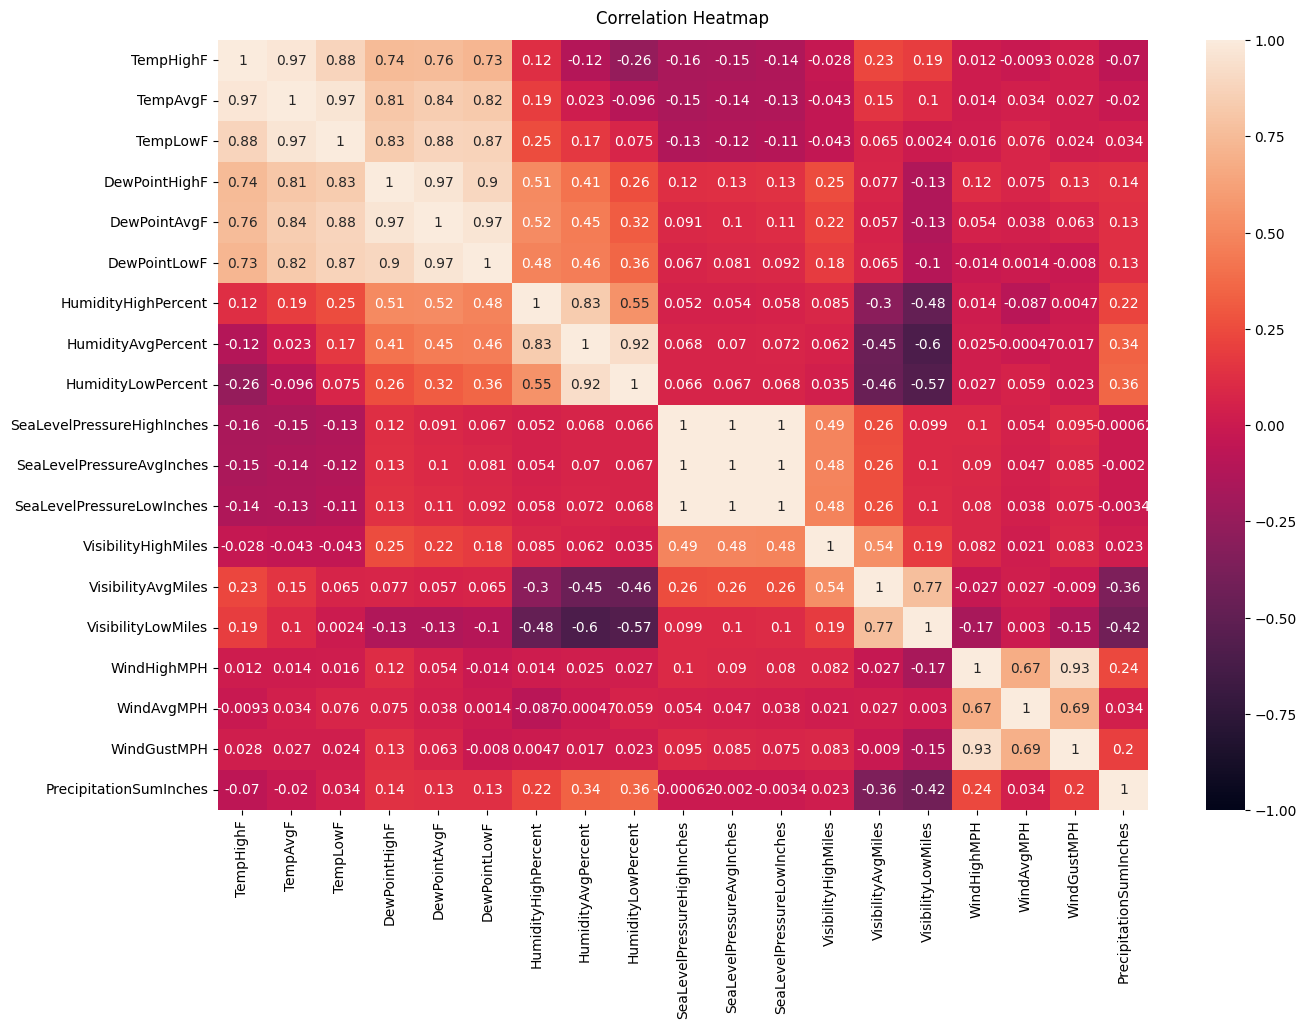

In [11]:
# menentukan ukuran plot
plt.figure(figsize=(15, 10))
# membuat korelasi heatmap
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot = True)
# menentukan format plot (judul, ukuran text)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# Model Building

In [12]:
# import libraries yang dibutuhkan
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [13]:
# memilih kolom untuk digunakan sebagai fitur model -- menghilangkan target variabel dan kolom tidak penting lainnya
x = data.drop(columns=['PrecipitationSumInches'])
# memilih kolom untuk digunakan sebagai variabel target
y = data['PrecipitationSumInches']

# membagi data ke training dan testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print("X_train : ", x_train.shape)
print("X_test : ", x_test.shape)
print("Y_train : ", y_train.shape)
print("Y_test : ", y_test.shape)

X_train :  (1055, 18)
X_test :  (264, 18)
Y_train :  (1055,)
Y_test :  (264,)


In [14]:
# membuat model linear regression
linear_regression_model = LinearRegression()
# "training" model dengan dataset yang sesuai
linear_regression_model.fit(x_train,y_train)

LinearRegression()

In [15]:
# mengambil koefisien yang didapatkan dari model
linear_regression_model.coef_

array([ 1.80640237e-02, -3.24851859e-02,  1.89409179e-02,  1.51900627e-02,
       -2.91277658e-02,  1.28494249e-02,  6.91790728e-03, -1.89872233e-02,
        1.52454941e-02, -3.22345471e-01,  4.80397517e-01, -1.62327340e-01,
        1.15819106e-01, -1.13416219e-01, -2.33489695e-03,  4.74248186e-02,
       -4.95955832e-02,  3.60761939e-04])

In [16]:
# menampilkan hasil linear regression (koefisien dari model)
coeff_data = pd.DataFrame(linear_regression_model.coef_, x.columns, columns = ["Coefficient"])
coeff_data

,Coefficient
TempHighF,0.018064
TempAvgF,-0.032485
TempLowF,0.018941
DewPointHighF,0.015190
DewPointAvgF,-0.029128
DewPointLowF,0.012849
HumidityHighPercent,0.006918
HumidityAvgPercent,-0.018987
HumidityLowPercent,0.015245
SeaLevelPressureHighInches,-0.322345


In [17]:
# mengambil bias dari model
linear_regression_model.intercept_

-0.4906524188981555

##Evaluation
Setelah mendapatkan linear regression model maka dilakukan test

In [18]:
# menggunakan model untuk memprediksi nilai matematika menggunakan testing dataset
predictions = linear_regression_model.predict(x_test)

In [19]:
#menampilkan x_test
x_test

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH
387,46,43,40,45.0,41.0,36.0,100.0,88.0,76.0,30.44,30.28,30.15,10.0,5.0,0.0,14.0,5.0,20.0
770,77,62,46,56.0,46.0,39.0,84.0,59.0,33.0,29.94,29.87,29.79,10.0,10.0,10.0,14.0,6.0,25.0
337,81,67,53,57.0,48.0,39.0,100.0,62.0,23.0,29.84,29.64,29.51,10.0,10.0,10.0,16.0,5.0,27.0
581,98,87,75,73.0,70.0,66.0,94.0,66.0,38.0,30.03,29.95,29.84,10.0,10.0,10.0,12.0,5.0,19.0
1152,65,54,43,38.0,33.0,27.0,82.0,53.0,24.0,30.22,30.16,30.12,10.0,10.0,10.0,16.0,7.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,88,75,62,54.0,48.0,42.0,67.0,46.0,25.0,30.30,30.22,30.17,10.0,10.0,10.0,9.0,4.0,16.0
349,75,69,63,66.0,64.0,59.0,100.0,82.0,64.0,30.18,30.08,30.03,10.0,8.0,2.0,12.0,5.0,20.0
1177,62,55,47,60.0,47.0,43.0,93.0,85.0,77.0,30.30,30.21,30.09,10.0,9.0,4.0,18.0,7.0,31.0
128,93,80,66,69.0,39.0,25.0,67.0,39.0,10.0,29.70,29.61,29.55,10.0,10.0,7.0,14.0,4.0,22.0


In [20]:
#menampilkan predicted score
df_test_set = x_test
df_test_set = df_test_set.join(y_test)
df_test_set['PREDICTED SCORE'] = predictions
df_test_set

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,PREDICTED SCORE
387,46,43,40,45.0,41.0,36.0,100.0,88.0,76.0,30.44,30.28,30.15,10.0,5.0,0.0,14.0,5.0,20.0,0.00,0.686899
770,77,62,46,56.0,46.0,39.0,84.0,59.0,33.0,29.94,29.87,29.79,10.0,10.0,10.0,14.0,6.0,25.0,0.00,-0.027877
337,81,67,53,57.0,48.0,39.0,100.0,62.0,23.0,29.84,29.64,29.51,10.0,10.0,10.0,16.0,5.0,27.0,0.00,-0.014894
581,98,87,75,73.0,70.0,66.0,94.0,66.0,38.0,30.03,29.95,29.84,10.0,10.0,10.0,12.0,5.0,19.0,0.00,-0.038894
1152,65,54,43,38.0,33.0,27.0,82.0,53.0,24.0,30.22,30.16,30.12,10.0,10.0,10.0,16.0,7.0,24.0,0.00,-0.087278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,88,75,62,54.0,48.0,42.0,67.0,46.0,25.0,30.30,30.22,30.17,10.0,10.0,10.0,9.0,4.0,16.0,0.00,-0.142017
349,75,69,63,66.0,64.0,59.0,100.0,82.0,64.0,30.18,30.08,30.03,10.0,8.0,2.0,12.0,5.0,20.0,0.01,0.244790
1177,62,55,47,60.0,47.0,43.0,93.0,85.0,77.0,30.30,30.21,30.09,10.0,9.0,4.0,18.0,7.0,31.0,0.01,0.538212
128,93,80,66,69.0,39.0,25.0,67.0,39.0,10.0,29.70,29.61,29.55,10.0,10.0,7.0,14.0,4.0,22.0,0.00,0.284731


Text(0, 0.5, 'Predicted Scores')

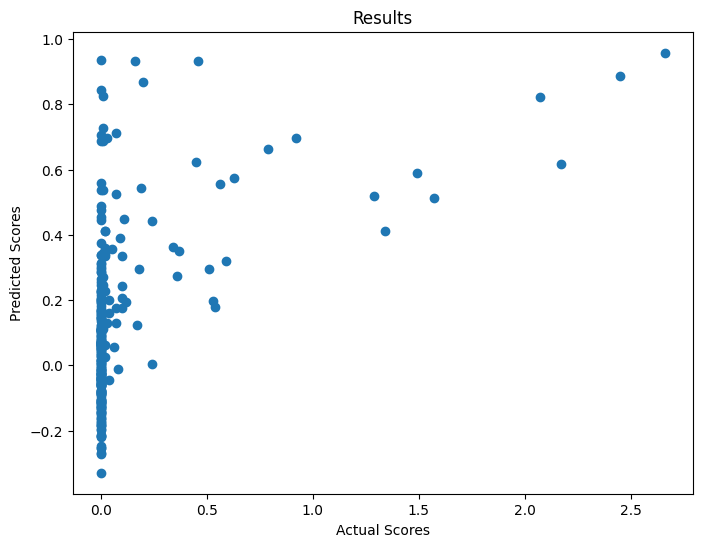

In [21]:
# membandingkan hasil prediksi dan nilai asli dalam plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)
plt.title("Results")
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")

In [22]:
# membandingkan hasil prediksi dan nilai asli dalam bentuk table
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df

,Actual,Predicted
387,0.00,0.686899
770,0.00,-0.027877
337,0.00,-0.014894
581,0.00,-0.038894
1152,0.00,-0.087278
...,...,...
665,0.00,-0.142017
349,0.01,0.244790
1177,0.01,0.538212
128,0.00,0.284731


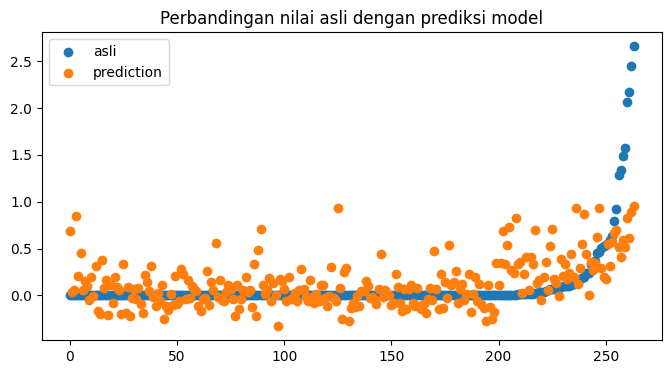

In [23]:
# import library dan menentukan ukuran plot
import numpy as np
plt.figure(figsize=(8, 4))

# mengurutkan nilai asli dari terkecil hingga tertinggi
y_sorted = np.sort(y_test.tolist())
y_sorted_index = np.argsort(y_test.tolist())

# merubah urutan prediction score berdasarkan urutan y_sorted
predictions_sorted = predictions[y_sorted_index]

# plot kedua score
plt.scatter(np.arange(0,len(y_sorted)), y_sorted, label='asli')
plt.scatter(np.arange(0,len(y_sorted)), predictions_sorted, label='prediction')
plt.title("Perbandingan nilai asli dengan prediksi model")
plt.legend()

In [24]:
# mengevaluasi model dengan 3 metrik berbeda
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


MAE: 0.19926042453928436
MSE: 0.10231810548889286
RMSE: 0.3198720142320876


In [35]:
# mengevaluasi model dengan metrik r_square untuk mengukur seberapa baik model cocok dengan data
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, predictions)
print(r_squared)

0.1658798191414791


# Prediksi Curah Hujan dengan Menginputkan Data (Variabel Independen) secara Manual

In [25]:
# membentuk matriks baris
inp = np.array([[102],[92],[81],[77.0],[73.0],[68.0],[91.0],[64.0],[37.0],[30.00],[29.93],[29.85],[10.0],[10.0],[10.0],[12.0],[5.0],[20.0]])

inp = inp.reshape(1, -1)

In [26]:
# Print output
print('Curah Hujan (dalam Inci) untuk input tersebut adalah :',linear_regression_model.predict(inp))

Curah Hujan (dalam Inci) untuk input tersebut adalah : [-0.01556787]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
